# [作業目標]
- 請同學試著查詢 pandas.cut 這個函數還有哪些參數, 藉由改動參數以達成目標
- 藉由查詢與改動參數的過程, 熟悉查詢函數的方法與理解參數性質, 並了解數值的離散化的調整工具

In [1]:
# 載入套件
import os
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right=True, labels=None, retbins=False, precision=3, include_lowest=False, duplicates='raise')
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or pandas.IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
        * sequence of scalars : Defines the bin edges all

In [3]:
help(pd.qcut)

Help on function qcut in module pandas.core.reshape.tile:

qcut(x, q, labels=None, retbins=False, precision=3, duplicates='raise')
    Quantile-based discretization function. Discretize variable into
    equal-sized buckets based on rank or based on sample quantiles. For example
    1000 values for 10 quantiles would produce a Categorical object indicating
    quantile membership for each data point.
    
    Parameters
    ----------
    x : 1d ndarray or Series
    q : integer or array of quantiles
        Number of quantiles. 10 for deciles, 4 for quartiles, etc. Alternately
        array of quantiles, e.g. [0, .25, .5, .75, 1.] for quartiles
    labels : array or boolean, default None
        Used as labels for the resulting bins. Must be of the same length as
        the resulting bins. If False, return only integer indicators of the
        bins.
    retbins : bool, optional
        Whether to return the (bins, labels) or not. Can be useful if bins
        is given as a scalar.
 

In [4]:
# 初始設定 Ages 的資料
ages = pd.DataFrame({"age": [18,22,25,27,7,21,23,37,30,61,45,41,9,18,80,100]})

#### 等寬劃分

In [5]:
# 新增欄位 "equal_width_age", 對年齡做等寬劃分
ages["equal_width_age"] = pd.cut(ages["age"], 4)

In [6]:
# 觀察等寬劃分下, 每個種組距各出現幾次
ages["equal_width_age"].value_counts() # 每個 bin 的值的範圍大小都是一樣的

(6.907, 30.25]    10
(30.25, 53.5]      3
(76.75, 100.0]     2
(53.5, 76.75]      1
Name: equal_width_age, dtype: int64

#### 等頻劃分

In [7]:
# 新增欄位 "equal_freq_age", 對年齡做等頻劃分
ages["equal_freq_age"] = pd.qcut(ages["age"], 4)

In [8]:
# 觀察等頻劃分下, 每個種組距各出現幾次
ages["equal_freq_age"].value_counts() # 每個 bin 的資料筆數是一樣的

(42.0, 100.0]     4
(26.0, 42.0]      4
(20.25, 26.0]     4
(6.999, 20.25]    4
Name: equal_freq_age, dtype: int64

# 作業
- 新增一個欄位 `customized_age_grp`，把 `age` 分為 (0, 10], (10, 20], (20, 30], (30, 50], (50, 100] 這五組，
'(' 表示不包含, ']' 表示包含  
- Hints: 執行 ??pd.cut()，了解提供其中 bins 這個參數的使用方式

# [作業重點]
- 仿照 In[3], In[4] 的語法, 並設定 pd.cut 的參數以指定間距

In [9]:
cut_rule = [0, 10, 20, 30, 50, 100]
ages["customized_age_grp"] = pd.cut(ages["age"],cut_rule)
ages

,age,equal_width_age,equal_freq_age,customized_age_grp
0,18,"(6.907, 30.25]","(6.999, 20.25]","(10, 20]"
1,22,"(6.907, 30.25]","(20.25, 26.0]","(20, 30]"
2,25,"(6.907, 30.25]","(20.25, 26.0]","(20, 30]"
3,27,"(6.907, 30.25]","(26.0, 42.0]","(20, 30]"
4,7,"(6.907, 30.25]","(6.999, 20.25]","(0, 10]"
5,21,"(6.907, 30.25]","(20.25, 26.0]","(20, 30]"
6,23,"(6.907, 30.25]","(20.25, 26.0]","(20, 30]"
7,37,"(30.25, 53.5]","(26.0, 42.0]","(30, 50]"
8,30,"(6.907, 30.25]","(26.0, 42.0]","(20, 30]"
9,61,"(53.5, 76.75]","(42.0, 100.0]","(50, 100]"


In [10]:
ages["customized_age_grp"].value_counts()

(20, 30]     6
(50, 100]    3
(30, 50]     3
(10, 20]     2
(0, 10]      2
Name: customized_age_grp, dtype: int64

In [11]:
ages_sort = np.sort(ages["customized_age_grp"].unique())
ages_sort

array([Interval(0, 10, closed='right'), Interval(10, 20, closed='right'),
       Interval(20, 30, closed='right'), Interval(30, 50, closed='right'),
       Interval(50, 100, closed='right')], dtype=object)

C:\Users\Ynitsed\Anaconda3\lib\site-packages\seaborn\distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Ynitsed\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Ynitsed\Anaconda3\lib\site-packages\numpy\lib\histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


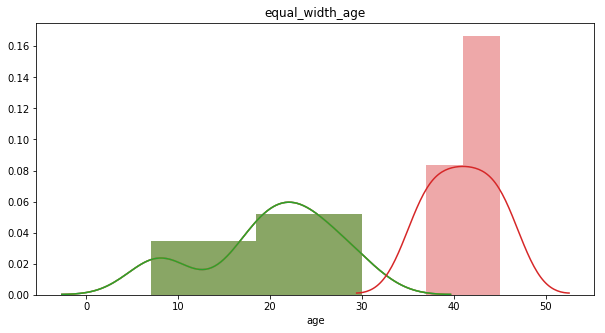

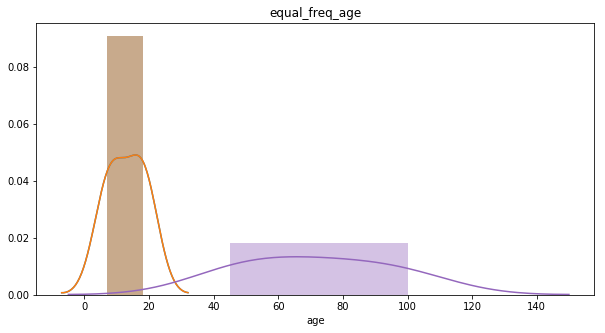

C:\Users\Ynitsed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Ynitsed\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


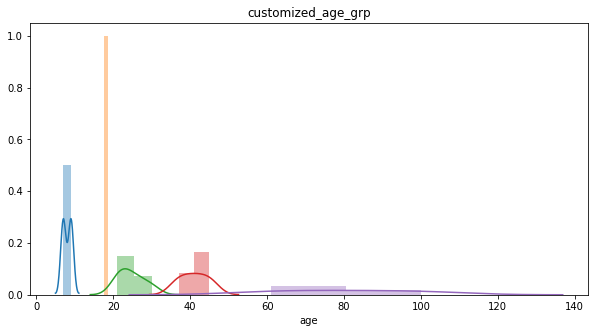

In [12]:
# 雖然知道小樣本跑KDE沒意義，但總是練習一下作圖要怎麼寫code

import seaborn as sns

plt.figure(figsize=(10,5))
for i in range(len(ages_sort)):
    sns.distplot(ages.loc[(ages["equal_width_age"] == ages_sort[i]),'age'] , label = ages_sort[i])
plt.title('equal_width_age')
plt.show()

plt.figure(figsize=(10,5))
for i in range(len(ages_sort)):
    sns.distplot(ages.loc[(ages["equal_freq_age"] == ages_sort[i]),'age'] , label = ages_sort[i])
plt.title('equal_freq_age')
plt.show()

plt.figure(figsize=(10,5))
for i in range(len(ages_sort)):
    sns.distplot(ages.loc[(ages["customized_age_grp"] == ages_sort[i]),'age'] , label = ages_sort[i])
plt.title('customized_age_grp')
plt.show()

### Day12教材方向和目標
1. pd.cut：依照連續值的欄位內容切等分
2. pd.qcut：依照頻率(出現次數)切等分
3. np.linspace：pd.cut會用到的參數，可以用np.linspace去切。
4. 也可以自訂cut_rule
cut_rule = np.linspace(25, 65, num = 9) 

### Day12忽略部分
1. qcut萬一有餘數的切法
 
### Day12其他補充
本日課程教材，難度適中、內容略少、架構清楚，算設計得很不錯。